<a href="https://colab.research.google.com/github/mahault/affect/blob/main/Affect_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# emotion inference demo

This demonstration (created in collaboration with Riddhi Jain Pitliya as the lead programmer) is designed to monitor the emotional dynamics of an agent as it navigates through the task of locating its wallet within a domestic setting. The core of this demonstration is the deployment of an emotional inference framework, structured as a hierarchical active inference model. This model is bifurcated into two distinct levels: the foundational level, where the agent is engaged in the practical task of wallet retrieval, and the elevated higher level, which is tasked with performing emotional analysis based on the lower level's activities.

Additionally, we introduce a baseline scenario, termed the wallet-finding-only task, which operates without the integration of the emotional inference system. This scenario serves as a control to contrast against the comprehensive emotional-wallet-finding task, thereby facilitating a comparative analysis of the two approaches.

In [2]:
!pip install inferactively-pymdp
import os
import sys
import pathlib
import numpy as np
import seaborn as sns
import copy
import matplotlib.pyplot as plt
import networkx
import typing
import shutil
import keyfunctions
import pymdp
import csv
import pymdp.maths as mdpmaths
from pymdp import utils
from pymdp import maths
from pymdp.agent import Agent

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.4 MB/s eta 0:00:00
  Attempting uninstall: sphinx
    Found existing installation: Sphinx 5.0.2
    Uninstalling Sphinx-5.0.2:
      Successfully uninstalled Sphinx-5.0.2


In [3]:
# defining the graph (environment) and generative process
graph, meta = keyfunctions.house(5,4)

# adding information to the metadata
meta["detect_wallet"] = ["present", "absent"]
meta["BR_level"] = ["normal_BR", "high_BR"]
meta["surprise_level"] = ["low_surprise", "normal_surprise", "high_surprise"]
meta["BRV_level"] = ["normal_BRV", "high_BRV"]

### emotional-walletfinding task

In [4]:
# calling the environment - state object_location
env = keyfunctions.Environment(graph, init_state = 0, object_location = 13, location_labels = meta["locations"])

In [5]:
# calling the two agents: wallet finding and emotional
wallet_agent = keyfunctions.build_agent_from_graph(graph, meta,
                                                    impreciseA=0.7, obj_loc_priors=[4,6])
emotional_agent = keyfunctions.build_emotional_agent()

In [6]:
# running the hierarchical active inference agent - specify lower agent timesteps (lower_t) and hier agent timesteps (hier_t)
replay_log = keyfunctions.run_hier_model(env, wallet_agent, emotional_agent, lower_t = 1, hier_t = 100,
                                          H_threshold = 2.0, metadata=meta)

'preciseA_EI.mp4'

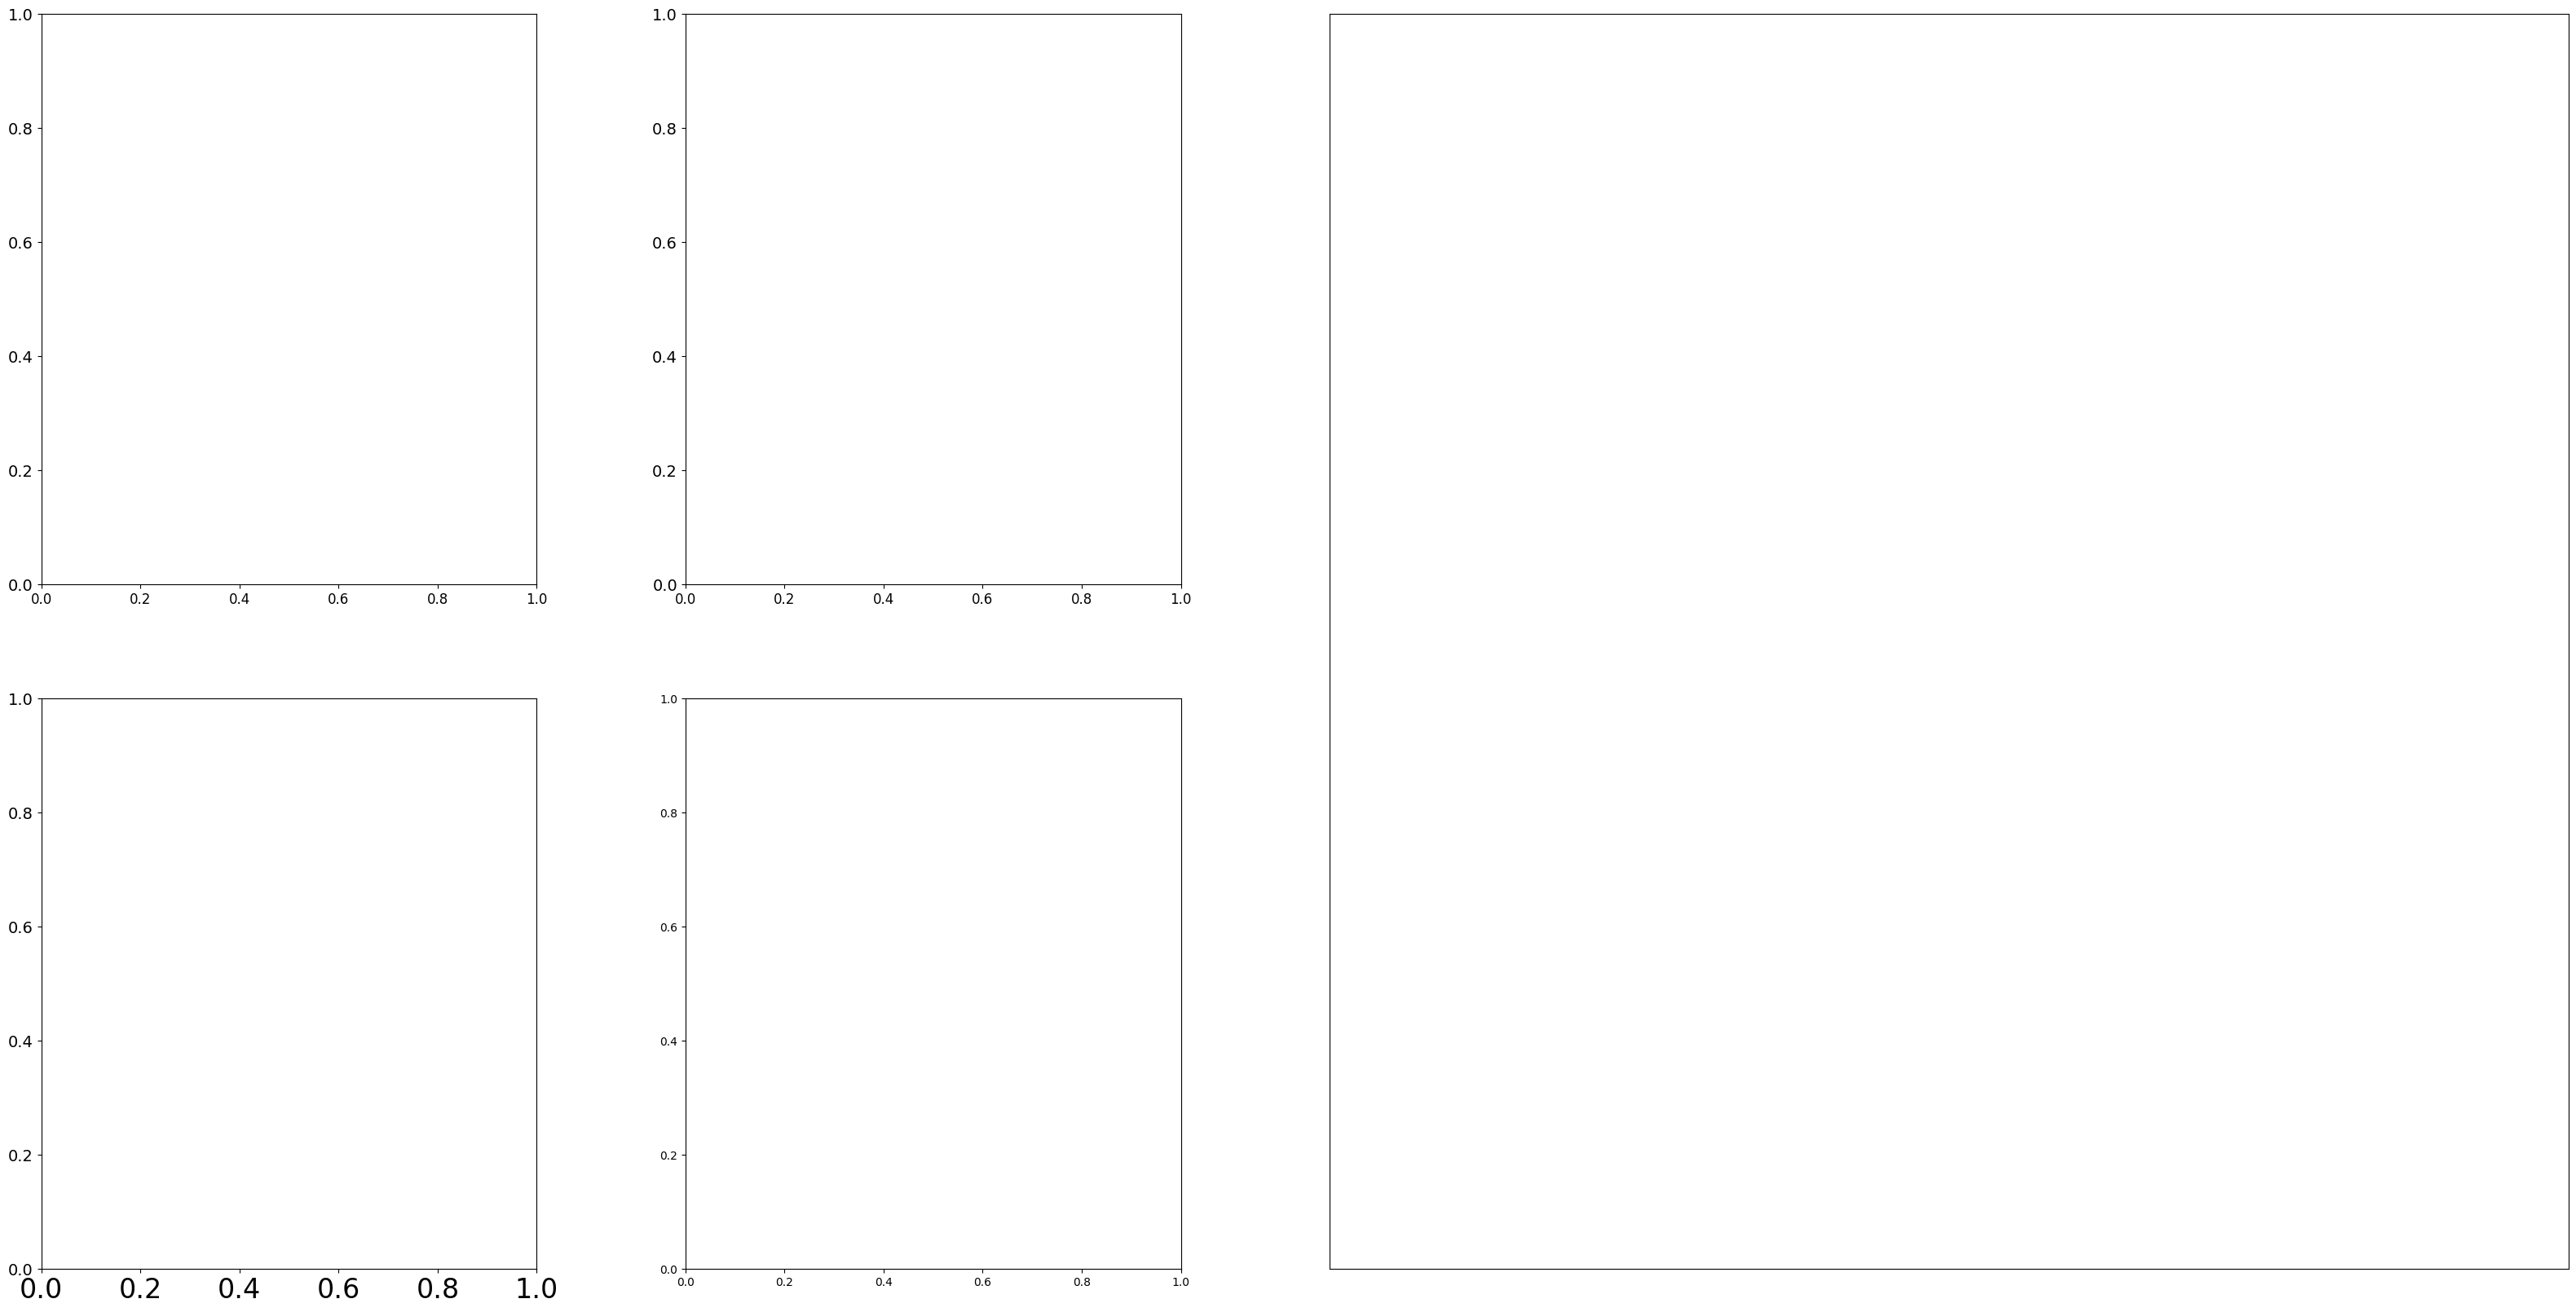

In [8]:
# reporting the activities - state object location at the third argument
keyfunctions.report_replay(graph, replay_log, 13, meta)
shutil.move("out.mp4", "preciseA_EI.mp4") # specify file name you want it saved as

Please enter the q_ent_plot's namefirst_output


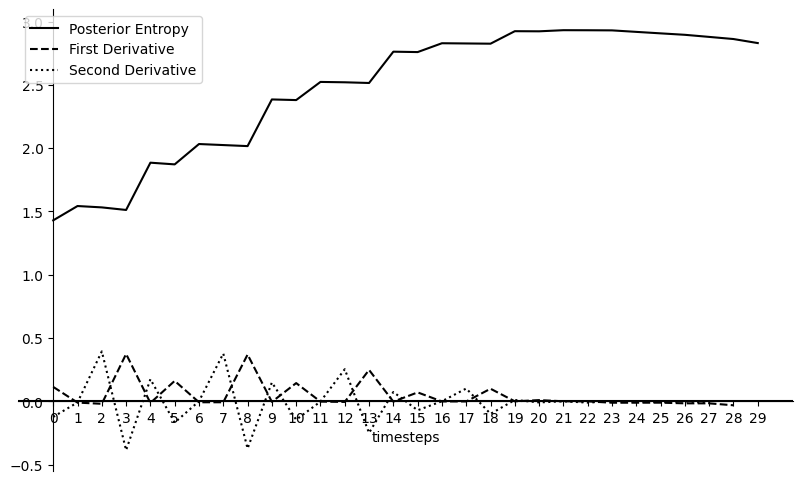

In [9]:
# plot q_ent and its first and second derivative
q_ent = replay_log["lower_q_entropy"]
first_derivative_q_ent = np.diff(q_ent)
second_derivative_q_ent = np.diff(first_derivative_q_ent)

def generate_time_steps(length):
    time_steps = [i * 1.0 for i in range(length)]
    return time_steps

desired_length = len(replay_log["lower_q_entropy"])
time_steps = generate_time_steps(desired_length)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(time_steps, q_ent, "k-",label='Posterior Entropy')
ax.plot(time_steps[:-1], first_derivative_q_ent, "k--", label='First Derivative')
ax.plot(time_steps[:-2], second_derivative_q_ent, "k:", label='Second Derivative')

ax.axhline(0, color='black')

ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xlabel('timesteps')

plt.xticks(time_steps)
plt.legend()

enter_qent_filename = input("Please enter the q_ent_plot's name")
qent_file_name = "qent_" + enter_qent_filename + ".jpeg"
plt.savefig(qent_file_name, dpi=300, bbox_inches='tight')

plt.show()



